# CHAPTER X

# Ordinary Differential Equations: Initial Value Problems
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(10.1) Ordinary Differential Equations](#odes)**
*  [First Order Initial Value Problems](#IVP) <br>
*  [Euler's method: explicit versus implicit](#euler) <br>
*  [Multi-stage solutions: the Runge-Kutta methods](#rk)

**[(10.2) Coupled and Higher-order ODEs](#coupled)**
*  [Systems of first-order ODEs: predators and prey](#systems) <br>
*  [Higher-order initial value problems](#higher) <br>
*  [Inbuilt python routines](#inbuilt10) <br>

**[Practice problems](#exer10)**



<a id='odes'></a>



## (10.1) Ordinary Differential Equations

Differential equations relate derivatives of an unknown function to itself, to the independent variable, or to known constants. They arise in physics, engineering, math, economics, and biology in quantiatively describing relationships between distributions and changes in variables with time or distance. Linear differential equations can often be solved analytically using standard tricks of differential equations. However, many systems have complicated nonlinear governing equations which are not amenable to straightforward analytical solutions. The next two tutorials introduce numerical strategies to find solutions to differential equations.

<a id='IVP'></a>



###  First Order Initial Value Problems

A differential equation with only one independent variable is called an **ordinary differential equations (ODE)**. When an ODE only involves the first derivative of the dependent variable, it is said to be **first-order**. For example, the following is one way to write any linear first-order ODEs of the function $f(x)$:

$$ \frac{dy(t)}{dt} + a(t) y(t) + b(t) = 0,$$

where $a$ and $b$ could be constants (or 0 or even polynomial functions in $t$). These are, in principle, solvable using integrating factors or separation of variables. More generally, first-order ODEs could be *nonlinear*, meaning terms like $\sqrt{y}$ or $e^y$ or $\sin(y)$ or $y^n$ or some such nonlinearity in the dependent variable could appear in the equation. For example, consider

$$ \frac{dy}{dt} = \frac{\sin(t)}{e^y}.  $$

Clearly, this is a nonlinear first-order ODE. But, separation of variables still works: we can rearrange as

$$ e^{y} \, dy = \sin(t) \, dt.  $$ 

Integrating each side gives (do this by hand to verify ...)

$$  y(t) = \ln\left[ C-\cos(t) \right].$$

Notably, the function depends on the constant of integration $C$. In other words, there are in general an infinite number of solutions for each choice of $C$. We can get a sense of this by mapping the slope of $y(t)$ as given by $dy/dt$ as a function of $t$ and $y(t)$. The direction of the slope gives a sense of the 'flow lines' of the solution in the $y$-$t$ plane. The following quiverplot illustrates these slopes or tangents at every point:

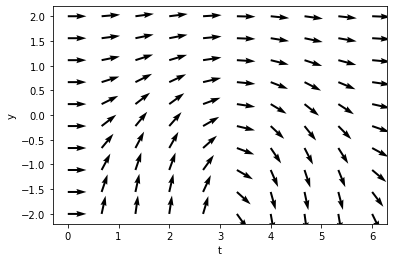

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,6,10)
y=np.linspace(-2,2,10)

tg,yg=np.meshgrid(t,y)

# determine 'horizontal' and 'vertical' component of dy/dt
dy=np.sin(tg)
dt=np.exp(yg)

# for illustration purposes, normalize all quivers so arrows are same size
mag=np.sqrt(dy**2+dt**2) 
dy/=mag
dt/=mag

plt.quiver(tg,yg,dt,dy)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

What differentiates each solution then is the **initial condition**, which specifies a unique point in the $y$-$t$ plane above that the solution has to pass through. For example, requiring that $y=0$ at $t=0$ gives $C=2$ so the unique solution becomes 

$$  y(t) = \ln\left[ 2-\cos(t) \right].$$

This is the analytical solution for this initial condition. We can overlay this plot on the 'flow lines' to see how this unique solution simply follows the local tangents at every point starting at $(t,y)=(0,0)$: 

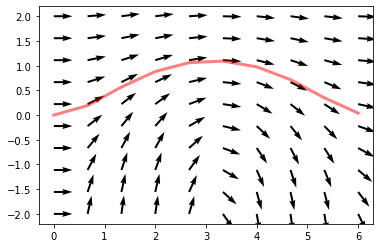

In [52]:
plt.quiver(tg,yg,dt,dy)#,pivot='middle')
plt.plot(t,np.log(2-np.cos(t)),'r',linewidth=3,alpha=0.5)
plt.show()

These problems are called **initial value problems**. Given an intial value, meaning a value of the dependent function at a location of the independent variable, the function is uniquely determined. In this example, the solution could be derived by hand, but that is not the case for more complicated or coupled differential equations. In what follows, we will learn numerical methods to obtain solutions where it is not easy or even possible to get analytical solutions. As most initial value problem are functions of time (so the 'intial' value is literally a value at initial time $t=0$, although not necessarily), we will mostly consider functions of time in the following sections.




<a id='euler'></a>



### Euler's methods

The most straightforward methods to numerically obtian solutions of first-order ODEs follow from the idea of Taylor series expansions (again). The first step is to write a given initial value problem in a 'standard' form, as follows:

$$ \frac{dy}{dt} = f(t,y), $$

where $f$ is in general a linear or nonlinear function in both the dependent variable $y$ and the independent variable $t$, and $f$ denotes the slope of the function $y$ at that point. Written this way, we can directly apply a Taylor series approximation for the derivative, which results in the familiar finite differences from tutorial 7. The choice of forward or backward finite differences then gives two broad classes of numerical methods:

#### Explicit Euler method

Explicit methods are those which use *current* slope to 'step forward' in time. Writing the forward difference or left rectangle approximation at time $t_i$  (where the function is known to be $y_i$) to get to a future time $t_{i+1}=t_i+h$ (where the function $y_{i+1}$ is unknown) and rearranging gives the the explicit Euler method:

$$ y_{i+1}(t_{i+1}) = y_i(t_i) + h f(t_i,y_i) + O(h^2). $$

In terms of the slope plot above, the explicit Euler method 'jumps forward' from the current time $t_i$ in the direction of the *current* slope $f(t_i,y_i)$. If the slope is not too steep, and if the time step $h$ is sufficiently small, we would land sufficiently close to the actual value of the function $y_{i+1}$ at $t_i+h$.

Once we get to the next time step $t_{i+1}$, we repeat the process and jump again to the following time step $t_{i+2}$, now using the slope information from $f(t_{i+1},y_{i+1})$, and so on until we obtain solutions for the entire range. Like with the integration of functions, adding up each 'panel' adds errors and smaller steps means more such 'panel': although each Euler step seems to be accurate to $O(h^2)$, the overall accuracy of the Euler method is therefore only first-order or $O(h)$.

The following code illustrates this idea by solving the differential equation $dy/dt=\sin(t)/e^y$ from above for the time range $t\in[0,10]$ with the initial condition $y(t=0)=0$:

In [55]:
# define slope function f(y,t) such that dy/dt=f
def f(y,t): return np.sin(t)*np.exp(-y)


# time range
h=0.5
t=np.arange(0,10+h,h)

# initialize solution
y=np.zeros(t.shape)

# initial conditon at t=0
y[0]=0

# explicit euler steps from 2nd to last point in time
for i in range(len(t)-1):
    # find slope
    k=f(y[i],t[i])
    # jump forward at current slope
    y[i+1]=y[i]+h*k

Let's plot the exact solution derived above with a fine resolution so we get a nice smooth curve, and see how our numerical solution compares:

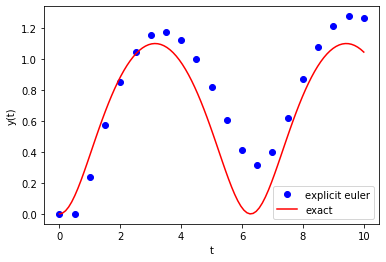

In [56]:
# numerical solution
plt.plot(t,y,'bo',label='explicit euler')

# analytical solution
t1=np.linspace(0,10,100)
plt.plot(t1,np.log(2-np.cos(t1)),'r',label='exact')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Now rerun the explicit euler steps with smaller time gaps (try $h=0.1$, $h=0.01$, ...) and see how close the numerical approximation gets to the analytical solution. As always, smaller time steps give more accurate and 'stable' solutions. With initial value problems, stability is a key issue: each subsequent time step builds on the prediction of the previous time step. So errors can throw a solution way off course. An explicit Euler method is always unstable. Smaller step size reduces the issue but it still persists: the errors *will* build up over long times.

#### Implicit Euler method

Explicit Euler method uses current slope to 'jump forward', with the potential issue that the future might be significantly different. And errors can build up as we keep moving ahead in time. The *implicit* Euler method tries to correct this issue by using the slope of the *future* point to decide the direction to jump towards. This is analogous to the backward difference or right rectangle at time $t_{i+1}$, rearranged to give:

$$ y_{i+1}(t_{i+1}) = y_i(t_i) + h f(t_{i+1},y_{i+1}) + O(h^2). $$

Conceptually, the only difference is that the slope function uses information at point $i+1$. However, implementing this is trickier because we do not know $y_{i+1}$, and therefore the function $f$, at time $i+1$ in the first place! In other words, $y_{i+1}$ solves the implicit (and potentially nonlinear) equation

$$ y_{i+1}- h f(t_{i+1},y_{i+1}) -y_i =0, $$

which requires implementing a root-finding algorithm (tutorial 5).

The following code implements the implicit Euler method using a Newton-Raphson root-finding algorithm.


In [58]:
# simplified Newton method 
# automatically evaluate derivatives using central finite differences
# runs to max 1000 steps and to a tolerance of 1e-6
def Newton(f,x_0):    
    x_est=x_0
    for i in range(1000):
        fder=(f(x_est+1e-3)-f(x_est-1e-3))/2e-3
        x_est-=f(x_est)/fder
        if np.abs(f(x_est))<1e-6: break
    return x_est


# same function and initial condition as before

# time range
h=0.5
t=np.arange(0,10+h,h)

# re-initialize solution
y=np.zeros(t.shape)

# initial conditon at t=0
y[0]=0

# implicit euler steps from 2nd to last point in time
for i in range(len(t)-1):
    # user-defined function whose root is unknown variable ynext=y[i+1]
    def func(ynext): return ynext-h*f(ynext,t[i]+h)-y[i]
    # run Newton, a reasonable starting guess is current y
    y[i+1]=Newton(func,y[i])

And let's compare again with the analytical solution:

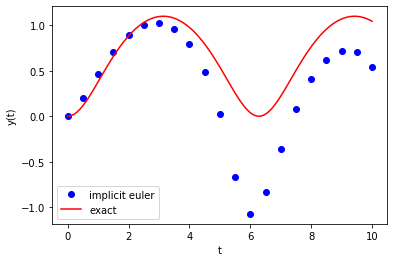

In [59]:
# numerical solution
plt.plot(t,y,'bo',label='implicit euler')

# analytical solution
t1=np.linspace(0,10,100)
plt.plot(t1,np.log(2-np.cos(t1)),'r',label='exact')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Observing the numerical solution closely, we can tell that the implicit Euler predicts the direction of change in advance and 'bends' that way before even getting there: a consequence of using the slope from future time to move forward. Contrast this with the explicit method which is oblivious of how the function changes at future times. 

Implicit methods are therefore is less likely to 'blow up' for oscillatory or rapidly changing function, especially for higher-order systems which we will consider later. In general, implicit methods are safer but are harder to implement because the root-finding might not be straightforward.

<a id='rk'></a>



### Multi-stage solutions: the Runge-Kutta methods

We can already tell from our results using the explicit and implicit methods above that the exact solution lies somewhere between the two. This is consistent with our experience with finite differences (central difference was more accurate that forward or backward) and with integration (trapezoidal method was more accurate that left or right rectangle methods). The same idea applied to solutions of ODEs: a more accurate numerical estimate can be obtained by correctly averaging the 'left' and 'right' slopes.

However, we would like to avoid implicit solution methods because root finding can be computationally expensive in more involved problems. Even with relatively simple ODEs, root finding takes multiple iterations to get to the implicit solution within each time step, and this can rapidly increase computational cost. Instead, we could use explicit calculations to mimic the 'right slope', and use some average of the left and right slopes to get a more accurate solution. A whole family of solutions called Runge-Kutta (RK) methods follows this logic, and we will see two such cases below:

#### Two-stage Runge-Kutta: Heun's method

The basic idea of RK methods is to improve the slope with which we 'step forward' from the current point $t_i$ to the next point $t_{i+1}$. Recall the explicit Euler formula

$$ y_{i+1}= y_i + h k ,$$

where $k=f(t_i,y_i)$ is the slope at the current point. With RK methods, this slope $k$ is replaced with a better estimate so as to land closer to the actual solution.

Heun's method is an example of two-stage RK methods (also called RK2). Here, the modified slope is simply the average of the slope at the current point, and the slope at the future point as predicted by the simple explicit Euler method:

$$ k_1 = f(t_i,y_i), \qquad  k_2 = f\left( t_{i}+h,y_i+hk \right) \\
y_{i+1} = y_i + \frac{h}{2}(k_1+k_2)$$

In other words, we would first use current slope $k_1$ to perform an explicit Euler step and evaluate the slope $k_2$ at the *predicted* future point. Then, we take the mean of $k_1$ and $k_2$ to get a *corrected* slope, and step forward using this average slope. For this reason, Heun's method is a type of "predictor-correcter" method. 

Heun's method can also be interpreted as the average of the left and right rectangles in integration. So Heun's method is conceptually the equivalent of the trapezoid rule of integration. Instead of using the actual 'right' point (which would require an implicit Euler which we would like to avoid), we use an explicit Euler to get to an approximate 'right' location, and then use the average of left and right slopes. This saves us the trouble of using implicit root-solving methods, and get improved accuracy using just one additional explicit step. The following code implements Heun's method for the same ODE as before: 

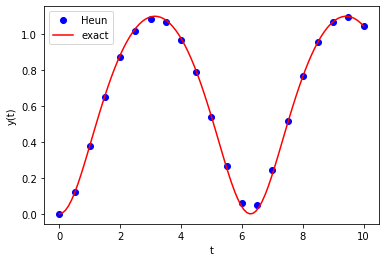

In [60]:
def f(y,t): return np.sin(t)*np.exp(-y)

# time range
h=0.5
t=np.arange(0,10+h,h)

# initialize solution
y=np.zeros(t.shape)

# initial conditon at t=0
y[0]=0

for i in range(len(t)-1):
    # left slope
    k1=f(y[i],t[i])

    # predicted right slope
    k2=f(y[i]+h*k1,t[i]+h)
    
    # average or corrected slope
    k=(k1+k2)/2
    
    # jump with modified average slope
    y[i+1]=y[i]+h*k

plt.plot(t,y,'bo',label='Heun')

# anaytical solution to compate
t1=np.linspace(0,10,100)
plt.plot(t1,np.log(2-np.cos(t1)),'r',label='exact')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Clearly, this is much better than a simple explicit or implicit Euler method. It can be shown that RK2 methods are $O(h^2)$ accurate across the entire range. Try different time steps $h$: notice that Heun's is more accurate at larger time steps than Euler at smaller steps because of second-order accuracy!


#### Four-stage Runge-Kutta

Introducing more intermediate stages gives better and better estimates of the 'correct' slope to step forward with. However, this comes at the price of more operations at every time step. A common compromise is the four-stage Runge-Kutta method (or simple *the* classic Runge-Kutta method or RK4). This method introduces intermediate steps between $t_i$ and $t_{i+1}$, and calculates a *weighted average across four different predicted slopes*. The result is a method that is accurate to $O(h^4)$ and is one of the most popular integration schemes for initial value problems. 

The RK4 method to step from $t_i$ to $t_{i+1}=t_i+h$ is as follows:

$$ k_1 = f(t_i,y_i), \qquad  k_2 = f\left( t_{i}+\frac{h}{2},y_i+\frac{hk_1}{2} \right),\qquad k_3 = f\left( t_{i}+\frac{h}{2},y_i+\frac{hk_2}{2} \right),\qquad k_4 = f\left( t_{i}+h,y_i+hk_3 \right) \\
y_{i+1} = y_i + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$


Conceptually, RK4 similar to the Simpson's rule of integration: a better estimate is found by dividing each time-step into sub-steps and giving more weightage to the values in the middle (rather than a trapezoid like simple average of left and right ends) to get a better estimate of the overall trajectory of the function. The following code implements RK4 for the same ODE as before: 

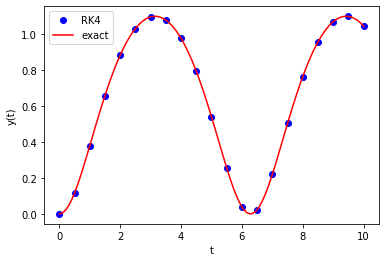

In [64]:
def f(y,t): return np.sin(t)*np.exp(-y)

# time range
h=0.5
t=np.arange(0,10+h,h)

# initialize solution
y=np.zeros(t.shape)

# initial conditon at t=0
y[0]=0

for i in range(len(t)-1):
    
    # RK4 substeps
    k1=f(y[i],t[i])
    k2=f(y[i]+h*k1/2,t[i]+h/2)
    k3=f(y[i]+h*k2/2,t[i]+h/2)
    k4=f(y[i]+h*k3,t[i]+h)
    
    # weighted average
    k=(k1+2*k2+2*k3+k4)/6
    
    # jump with modified average slope
    y[i+1]=y[i]+h*k

plt.plot(t,y,'bo',label='RK4')

# analytical solution to compare
t1=np.linspace(0,10,100)
plt.plot(t1,np.log(2-np.cos(t1)),'r',label='exact')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Vary $h$ to see how accurate RK4 is relative to Heun's method. In fact, RK4 gives numerical solutions that are right on top of the exact analytical solution for $h$ as large as 1 in this example. For this reason, RK4 is a very powerful and commonly used explicit ODE solver. It requires four intermediate calculations at each time-step, but provides way more accuracy than a simple implicit solution or Heun's method.

Note that the slope function $f$ need not always depend on the independent variable; however, the formula remains the same. For example, the ODE $dy/dt=-y^2$ has $f(t,y)=-y^2$ which is independent of $t$; so we can safely ignore the $t$ dependence and nothing changes in the code. The same RK4 code above works such cases too. Try it.

For future use, create a packaged function RK4 that takes in any user-defined $dy/dt=f(y,t)$ and a time range and an initial condition, and returns the solution of the initial value problem:

In [17]:
# packaged RK4 for any user-defined funtion

<a id='coupled'></a>



## (10.2) Coupled and Higher-order ODEs


With the methods so far, we can numerically solve any first-order ODE of the form $dy/dt=f(y,t)$ with an intial condition $y(t=0)=y_0$. We can easily extend this idea to coupled systems of initial value problems (e.g. $dy/dt=f(y,x,t)$ and $dx/dt=g(y,x,t)$) and to higher-order differential equations (e.g. $d^2y/dt^2=f(y,y',t)$).

<a id='systems'></a>



### Coupled systems of ODEs: Predators and prey

Most real dynamics represented by ODEs are coupled to other physical processes. For examples, the rate of production of a chemical may be represented as an ODE but it would depend on the concentration of a reactant which itself is represented by another ODE. In many cases, the reactant and product concentrations depend nontrivially on each other and the differential equations may be coupled, making it extremely difficuly or even impossible to directly solve by hand. However, the numerical schemes above can be easily adapted to handle systems of ODEs.


For example, consider the following coupled system of ODEs:

$$ \frac{dx}{dt} = B_x x - D_x  x  y, \\ \frac{dy}{dt} = B_y x y- D_y y, $$

that describes the inter-dependent dynamics of two quantities $x(t)$ and $y(t)$. This is a simplified case of the so-called 'predator-prey problem'. Written this way, $x(t)$ and $y(t) $represent a 'prey' and 'predator' population, respectively. The growth or reduction of both populations are proportional on their current sizes with constant birth rates $B_x$ and $B_y$, and constant death rates $D_x$ and $D_y$. Additionally, the reduction in prey numbers is proportional to predator numbers (as they get hunted more), and the increase in predator size is proportional to prey numbers (as they have more food). This simple set of relations give rise to interesting coupled nonlinear dynamics.

These are a simplified case of complex models that represent actual prey and preadators (e.g. hare and lynx in a forest, gazelle and lions in a sanctuary): see [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) for details. Adaptations of these equations are also used to model biological and ecological systems that have similar characteristics: for example, nutrients as 'prey' and number of microbes as 'predator'; or susceptible individuals as 'prey' and an infection as 'predator'; a chemical marker as 'prey' that is 'consumed' by a reaction product, etc.

We can rewrite the system as 

$$ \frac{dx}{dt} = f_x(t,x,y), \\ \frac{dy}{dt} = f_y(t,x,y). $$

Solving for $y_i$ at a time $t_i$ then requires knowing $x_i$ becuase it appears in $f_y$. And *vice versa* for solving $x_i$: we would need $y_i$ at the current time. However, the approach is similar to before: we just need to carefully keep track of changes in *both* $f_x$ and $f_y$ before moveing on to the next time step. For example, the explicit Euler method for this system is

$$ x_{i+1} = x_i + h f_x (t,x_i,y_i),\qquad y_{i+1} = y_i + h f_y (t,x_i,y_i) $$


Extending the analogy, the RK4 method requires intermediate slopes $k_{x}$ and $k_{y}$ corresponding to the two functions at four steps, found sequentially as:

$$ k_{x1} = f_x(t,x_i,y_i), \qquad k_{y1} = f_y(t,x_i,y_i) \\ 
k_{x2} = f_x\left( t_{i}+\frac{h}{2},x_i+\frac{hk_{x1}}{2},y_i+\frac{hk_{y1}}{2} \right),\qquad k_{y2} = f_x\left( t_{i}+\frac{h}{2},x_i+\frac{hk_{x1}}{2},y_i+\frac{hk_{y1}}{2} \right)\\ 
k_{x3} = f_x\left( t_{i}+\frac{h}{2},x_i+\frac{hk_{x2}}{2},y_i+\frac{hk_{y2}}{2} \right),\qquad k_{y3} = f_x\left( t_{i}+\frac{h}{2},x_i+\frac{hk_{x2}}{2},y_i+\frac{hk_{y2}}{2} \right)\\ 
k_{x4} = f_x\left( t_{i}+h,x_i+hk_{x3},y_i+hk_{y3} \right), \qquad k_{y4} = f_y\left( t_{i}+h,x_i+hk_{x3},y_i+hk_{y3} \right) $$


Once the four slopes of each function are known, both $x(t)$ and $y(t)$ are advanced to the next time step following the same weighted average as before:

$$x_{i+1} = x_i + \frac{h}{6}(k_{x1}+2k_{x2}+2k_{x3}+k_{x4}), \qquad y_{i+1} = y_i + \frac{h}{6}(k_{y1}+2k_{y2}+2k_{y3}+k_{y4})$$

And the same idea can be extended to systems with more than 2 couples ODEs. The key is to determine all intermediate slopes $k_{x1}, k_{y1}, \ldots $ before proceeding to the second step for $k_{x2}, k_{y2}, \ldots $, and so on. 

The following code implements the two-ODE system from above using RK4.

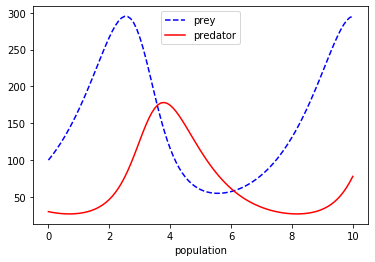

In [70]:
# define birth and death constants
bx=0.8
by=0.007

dx=0.01
dy=1

# define both functions
def fx(x,y,t): return bx*x-dx*x*y
def fy(x,y,t): return by*x*y-dy*y

# time range
h=0.1
t=np.arange(0,10+h,h)

# initialize solutions
x=np.zeros(t.shape)
y=np.zeros(t.shape)

# initial conditon at t=0
x[0]=100
y[0]=30

for i in range(len(t)-1):
    
    # RK4 substeps
    kx1=fx(x[i],y[i],t[i])
    ky1=fy(x[i],y[i],t[i])
    
    kx2=fx(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    ky2=fy(x[i]+h*kx1/2,y[i]+h*ky1/2,t[i]+h/2)
    
    kx3=fx(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    ky3=fy(x[i]+h*kx2/2,y[i]+h*ky2/2,t[i]+h/2)
    
    kx4=fx(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    ky4=fy(x[i]+h*kx3,y[i]+h*ky3,t[i]+h)
    
    # weighted average
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    ky=(ky1+2*ky2+2*ky3+ky4)/6
    
    # jump with modified average slope
    x[i+1]=x[i]+h*kx
    y[i+1]=y[i]+h*ky

plt.plot(t,x,'b--',label='prey')
plt.plot(t,y,'r',label='predator')

plt.xlabel('time')
plt.xlabel('population')
plt.legend()
plt.show()

The trends make logical sense: initially, there are 100 prey and 30 predators. As the prey population grows substantially, the predators get food-rich and begin to grow in numbers. As predator numbers increase, more prey are consumed, leading to a drop in prey population which eventually leads to food shortage for the predators. Beyond a point, the dwindling food supply causes predators to drop in population. The prey slowly makes a recovery when it gets safer for them as the predator numbers drop substantially. The cycle then continues. Change the initial numbers to study different cases. Try playing around with the birth and death rates. 

Of course, this is just a simple model but the trends are representative of real predator-prey dynamics like in the plot [here](https://en.wikipedia.org/wiki/Lotka–Volterra_equations). Try to rationalize what would happen if we start with zero predator population but finite prey population (say, $x(0)=100$ and $y(0)=0$). What about the inverse, with no prey but finite predators ($x(0)=0$ and $y(0)=30$). Solve these cases and see if you can justify the solutions.

<a id='higher'></a>



### Higher-order ODEs

A second-order ODE of a function $y$ with the independent variable $t$ can be written as

$$ \frac{d^2y}{dt^2} = f\left( t,y,\frac{dy}{dt} \right) $$

Since there are two derivatives, we need two initial conditions. These are typically provided as the value of the function $y(0)$ and its slope $dy(0)/dt$ at initial time. This kind of second-order ODEs can be easily transformed into a *system of two first-order ODEs* using the transform:

$$ w = \frac{dy}{dt} $$

so that 

$$ \frac{dw}{dt} = \frac{d^2y}{dt^2}. $$

Then, our original second-order equation becomes:

$$ \frac{dw}{dt} = f_w\left( t,y,w \right), \qquad \frac{dy}{dt} = f_y\left( t,y,w \right), $$

where $f_w$ is the same function $f$ as before and $f_y$ simply returns $w$. The initial condition for $dy/dt$ becomes the initial condition for $w(t)$. Once in this form, the same procedure as before to solve a system of ODEs works. In general, an initial value ODE of N-th order can be transformed into a system of N first-order equations in this manner.

For example, consider the damped harmonic oscillator we frequently see in introductory physics classes:

$$ m \frac{d^2x}{dt^2} +c \frac{dx}{dt} + kx = 0,$$

where $m$ is the mass so the first term is the inertial force, $c$ is a damping constant which is part of the friction term, and $k$ is the spring constant which provides a restoring force. Setting $c=0$ would give the simple harmonic oscillator with no damping. The initial conditions for this system are typically provided as the initial position $x(t=0)=x_0$ and initial velocity $v(t=0)=dx(0)/dt=v_0$.

To recast this as a system of two equations, we first define a new variable which is the derivative of the original dependent variable. Since here $x$ denotes position, it makes sense to call this new variable $v$ for velocity. Then $dx/dt=v$ and $d^2x/dt^2 = dv/dt$. The two-equation system corresponding to the damped harmonic oscillator is then:

$$ \frac{dx}{dt} = v \qquad \frac{dv}{dt} = -\frac{c v}{m} -\frac{k x}{m}, $$

which is in the standard form

$$ \frac{dx}{dt} = f_x(t,x,v), \qquad \frac{dv}{dt} = f_v(t,x,v). $$

We can directly implement this using pretty much the same code as before:



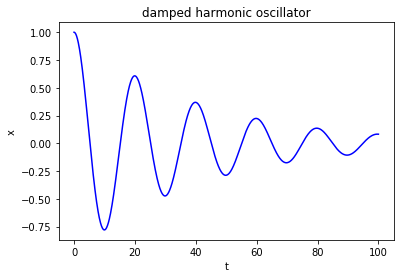

In [72]:
# define parameters
c=0.05
k=0.1
m=1

def fx(x,v,t): return v
def fv(x,v,t): return -c*v/m-k*x/m

# time range
h=0.1
t=np.arange(0,100+h,h)

# initialize solutions
x=np.zeros(t.shape)
v=np.zeros(t.shape)

# initial conditon at t=0
x[0]=1
v[0]=0

for i in range(len(t)-1):
    
    # RK4 substeps
    kx1=fx(x[i],v[i],t[i])
    kv1=fv(x[i],v[i],t[i])
    
    kx2=fx(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    kv2=fv(x[i]+h*kx1/2,v[i]+h*kv1/2,t[i]+h/2)
    
    kx3=fx(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    kv3=fv(x[i]+h*kx2/2,v[i]+h*kv2/2,t[i]+h/2)
    
    kx4=fx(x[i]+h*kx3,v[i]+h*kv3,t[i])
    kv4=fv(x[i]+h*kx3,v[i]+h*kv3,t[i])
    
    # weighted average
    kx=(kx1+2*kx2+2*kx3+kx4)/6
    kv=(kv1+2*kv2+2*kv3+kv4)/6
    
    # jump with modified average slope
    x[i+1]=x[i]+h*kx
    v[i+1]=v[i]+h*kv

plt.plot(t,x,'b-')
plt.title('damped harmonic oscillator')
plt.ylabel('x')
plt.xlabel('t')
plt.show()

Change the initial conditions and/or parameters to see if the solution makes sense with what you expect. For example, $c=0$ is the simple harmonic oscillator with no damping: try it. 

From introductory physics, it can also be shown that the time period of oscillation is $T=2\pi \sqrt{m/k}$. Calculate $T$ for the parameters used above and see if the peak-to-peak time is consistent with this formula. Then, 'design' a spring constant for an oscillator of mass $m=1$ that has a time period of $T=10\pi\approx31.4$. Does the plot reflect this?

<a id='inbuilt10'></a>



### Inbuilt python routines

As always, python has inbuilt ODE solvers. The inbuilt function `scipy.integrate.odeint` takes in a user-defined function, an intial condition, and an array of independent variable, and returns the solution. It's important while using `odeint` to define $f(y,t)$ with the dependent variable $y$ first and the independent variable $t$ next: this order is important. The following code shows the solution to $dy/dt=\sin(t)e^{-y}$ we saw above with the initial condition $y(0)=0$.

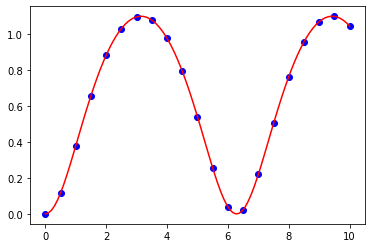

In [74]:
def f(y,t): return np.sin(t)*np.exp(-y)

y0=0
h=0.5
t=np.arange(0,10+h,h)

import scipy.integrate as si
y = si.odeint(f,y0,t)

plt.plot(t,y,'bo')

# compare with analytical solution from before
t1=np.linspace(0,10,100)
plt.plot(t1,np.log(2-np.cos(t1)),'r',label='exact')

plt.show()

Compare this with our RK4 method: they should be identical. 

Systems of ODEs can be solved the same way. Like with inbuilt python function for roots of systems of equations (tutorial 5), here we must supply a *vector* function $F(Y,t)$ with a *vector* $Y$ of dependent variables. The initial condition is also provided as a vector with as many entries as there are equations. The output, obviously, is also a vector that must be correctly unpacked to get each solution. The following code solves the predator-prey problem from above using `odeint`:

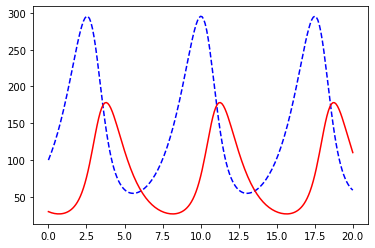

In [75]:
bx=0.8
by=0.007

dx=0.01
dy=1

# F returns two outputs, corresponding to two functions
# Y contains two entries, corresponding to two dependent variables
def F(Y,t): return [bx*Y[0]-dx*Y[0]*Y[1],by*Y[0]*Y[1]-dy*Y[1]]

# time range
h=0.1
t=np.arange(0,20+h,h)

# Y0 contains two entries, corresponding to two initial conditions
Y0=[100,30]


import scipy.integrate as si
Y= si.odeint(F,Y0,t)

plt.plot(t,Y[:,0],'b--')
plt.plot(t,Y[:,1],'r')
plt.show()

Again, this is identical to our RK4 solution from before. `odeint` allows passing arguments and constants etc for advanced users; read more about it in the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).


<a id='exer10'></a>



## Practice Problems

(1) Create packaged ODE initial value solvers using Heun's and RK4. Theses functions must take a user-defined function, an initial condition, and an array of the independent variable, and return the solution.

In [1]:
# Heun's method: packaged function



In [2]:
# RK4's method: packaged function



(2) Use your `heun` and `rk4` from above, as well as `scipy.integrate.odeint`, to solve and plot to compare solutions of:

(2a) Solve $y(t)$ from $t=0$ to $t=1$ if $y(0)=2$. Use a time step size of $0.1$.

$$ \frac{dy}{dt} = -\frac{yt}{10}$$

(1b) Solve $y(t)$ from $t=0$ to $t=5$ if $y(0)=1$. Use a time step size of $0.5$.

$$ \frac{dy}{dt} = e^{-yt}$$

(1c) Solve $x(s)$ from $s=0$ to $s=5$ if $x(0)=1$. Try $s$ step sizes of $0.5$ first, and $0.1$ next.

$$ x^4 \frac{dx}{ds} = \sin(3s)$$

(2) When an current passes through a conducting coil wrapped around an iron core, the core is magnetized per unit area of cross section $\phi$ following:

$$ \frac{d\phi}{dt} = V- a \phi -b \phi^3 $$

where $V$ is the voltage and $a,b$ are material constants. Use `rk4` to find $\phi$ as for time $t\in[0,1]$ for $V=50$, $a=2.5$ and $b=0.01$ for three different initial conditions: $\phi(0)=0$, $\phi(0)=5$, and $\phi(0)=20$. Plot all three solutions on the same graph. Use a time step size of $0.01$.

The 'steady-state' or the equilibrium value of $\phi$ can be obtained by setting $d\phi/dt=0$ and solving for $\phi$. Calculate the steady-state value for the given parameters. Does you numerical solution approach this value?

(3) The concentration $C$ and temperature $T$ in a reactor are described by the following coupled ODEs:

$$ \frac{dC}{dt} = k_1 C e^{-T_r/T},\qquad \frac{dT}{dt} = k_2 C e^{-T_r/T}, $$

where initially $C=550\,{\rm gm}$ and $T=300\,{\rm K}$. Plot the concentration and temperature for the first $100\,{\rm s}$ if $T_r=300\,{\rm K}$, $k_1=-0.1\,{\rm s^{-1}}$, and $k_2=0.06 \,{\rm K/gm}$. Use a coupled RK4 method.

(4) Redo problem (3) using `odeint`.

(5) The angle of a friction-less swing or a pendulum $\theta$ is governed by the force balance between its inertial force (mass times acceleration) and the gravitational force pulling it down vertically:

$$ m \frac{d^2 (L \theta)}{d t^2} = -m g \sin (\theta). $$

Here, $\theta$ is in radians, $L$ is a constant length, and $g=9.81\, {\rm m/s^2}$. Determine $\theta(t)$ for the first $10$ seconds for a swing of length $5\,{\rm m}$ that is let go without a push (so, zero initial velocity) at an angle of thirty degrees from the vertical line . Plot the angle in degrees as a function of time.

(5b) For small angles (in radians, again), a useful approximation is $\sin(x)\approx x$. Simplify your swing equation and solve in this approximate case. Plot to compare the predicted angles from the actual and approximate solutions for the same length and initial conditions. 

*Note: this simplification should reduce your problem to an undamped simple harmonic oscillator*